In [4]:
import pandas as pd
invent=pd.read_csv("sales_transactions.csv")

In [5]:
invent

,TransactionID,Date,City,CustomerID,CustomerType,Category,UnitsSold,UnitPrice,Revenue,Discount,SalesRep
0,T001,2024-01-15,Lagos,C001,New,Electronics,2,150000,300000,5000,Chuka Obasi
1,T002,2024-01-18,Abuja,C002,Returning,Appliances,1,85000,85000,0,Mary Felix
2,T003,2024-01-20,Port Harcourt,C003,New,Accessories,4,5000,20000,200,Abdul Salim
3,T004,2024-01-21,Lagos,C004,Returning,Electronics,1,160000,160000,3000,Chuka Obasi
4,T005,2024-02-01,Kano,C005,New,Appliances,2,90000,180000,4000,Mary Felix
...,...,...,...,...,...,...,...,...,...,...,...
105,T106,2024-03-05,Lagos,C046,New,Electronics,2,155000,310000,500,Abdul Salim
106,T107,2024-10-23,Port Harcourt,C061,Returning,Electronics,2,155000,310000,4000,Mary Felix
107,T108,2024-09-08,Port Harcourt,C070,New,Accessories,1,5500,5500,500,Mary Felix
108,T109,2024-02-10,Kano,C135,New,Electronics,2,150000,300000,200,Chuka Obasi


In [45]:
invent["Date"].astype("datetime64[ns]")

0     2024-01-15
1     2024-01-18
2     2024-01-20
3     2024-01-21
4     2024-02-01
         ...    
105   2024-03-05
106   2024-10-23
107   2024-09-08
108   2024-02-10
109   2024-11-08
Name: Date, Length: 110, dtype: datetime64[ns]

In [46]:
invent.dropna(inplace=True)     
invent.dropna(axis=1, inplace=True) 


In [47]:
invent.drop_duplicates(inplace=True)


In [48]:
#1. What is the total revenue generated in the dataset?
total_revenue = invent['Revenue'].sum()
print(f"1. Total revenue generated: ₦{total_revenue:,.2f}")


1. Total revenue generated: ₦29,521,000.00


In [49]:
#2. How many total transactions were recorded?
total_transaction= invent["TransactionID"].count()
print("2. total transaction recorded:", total_transaction)

2. total transaction recorded: 110


In [50]:
 #3 How many distinct customers made purchases?
Distinct_customer= invent["CustomerID"].nunique()
print("3. Distinct customer:", Distinct_customer)


3. Distinct customer: 77


In [51]:
#4. What is the total revenue generated from Lagos alone?
total_lagos_revenue = invent.loc[invent['City'] == 'Lagos', 'Revenue'].sum()
total_lagos_revenue
print(f"4. total revenue from Lagos: ₦{total_lagos_revenue:,.2f}")


4. total revenue from Lagos: ₦9,285,500.00


In [10]:

# --- 5. Units of "Accessories" sold in Abuja ---
accessories_units_abuja = invent.loc[
    (invent["City"].str.lower() == "abuja") & (invent["Category"].str.lower() == "accessories"),
    "UnitsSold"
].sum()
print("5. Units of Accessories sold in Abuja:", accessories_units_abuja)

5. Units of Accessories sold in Abuja: 22


In [53]:
# 6. Average discount offered ---
avg_discount = invent["Discount"].mean()
avg_discount
print(f"6. Average discount offered:₦{avg_discount:,.2f}")

6. Average discount offered:₦3,248.18


In [54]:
#7What was the revenue for February 2024?
invent["Date"] = pd.to_datetime(invent["Date"])

feb_2024_revenue = invent[(invent["Date"].dt.month == 2) & (invent["Date"].dt.year == 2024)]["Revenue"].sum()
feb_2024_revenue
print(f"7. Revenue for February 2024:₦{feb_2024_revenue:,.2f}")

7. Revenue for February 2024:₦3,855,000.00


In [55]:
#8 Which month had the highest sales revenue?
monthly_revenue = invent.groupby(invent["Date"].dt.to_period("M"))["Revenue"].sum()

highest_month = monthly_revenue.idxmax()
highest_value = monthly_revenue.max()

print(f"The month with the highest revenue is {highest_month} with total revenue of ₦{highest_value:,.2f}")


The month with the highest revenue is 2024-09 with total revenue of ₦4,744,500.00


In [81]:
9.#Create a measure to calculate monthly revenue trend
monthly_revenue_trend=monthly_revenue.reset_index()
monthly_revenue_trend['YearMonth']=monthly_revenue_trend['YearMonth'].astype(str)
print(monthly_revenue_trend.to_markdown(index=False, numalign="left", stralign="left"))

| index   | YearMonth   | Revenue   |
|:--------|:------------|:----------|
| 0       | 2024-01     | 2943000   |
| 1       | 2024-02     | 3855000   |
| 2       | 2024-03     | 2184500   |
| 3       | 2024-04     | 1559500   |
| 4       | 2024-05     | 2484500   |
| 5       | 2024-06     | 1083000   |
| 6       | 2024-07     | 1340000   |
| 7       | 2024-08     | 552500    |
| 8       | 2024-09     | 4744500   |
| 9       | 2024-10     | 2739000   |
| 10      | 2024-11     | 2009500   |
| 11      | 2024-12     | 3889000   |
| 12      | 2025-01     | 137000    |


In [ ]:
invent

In [11]:
# 10 What is the revenue split between New and Returning customers?
revenue_split = invent.groupby("CustomerType")["Revenue"].sum().reset_index()
revenue_split
print("\n10. Revenue split between New and Returning customers:\n", revenue_split)


10. Revenue split between New and Returning customers:
   CustomerType   Revenue
0          New  12027000
1    Returning  17494000


In [79]:
#11. What is the average revenue per customer?
avg_revenue_per_customer = invent.groupby("CustomerID")["Revenue"].sum().mean()
avg_revenue_per_customer
print(f"11. Average revenue per customer:₦{avg_revenue_per_customer:,.2f}")

11. Average revenue per customer:₦383,389.61


In [80]:
## --- 12. Customers who bought more than once ---
customer_counts = invent["CustomerID"].value_counts()
customers_more_than_once = (customer_counts > 1).sum()
customers_more_than_once
print("12. Customers who bought more than once:", customers_more_than_once)

12. Customers who bought more than once: 23


In [88]:
# --- 13. Product category that generated the most revenue ---
category_revenue = invent.groupby("Category")["Revenue"].sum().reset_index()
top_category_row = category_revenue.loc[category_revenue["Revenue"].idxmax()]

top_category_revenue = top_category_row["Category"], top_category_row["Revenue"]
top_category_revenue 
print("13. Category with highest revenue:", top_category_row, "=>", top_category_revenue)

13. Category with highest revenue: Category    Electronics
Revenue        19149000
Name: 2, dtype: object => ('Electronics', np.int64(19149000))


In [13]:
# --- 14. Average revenue per unit for Electronics ---
electronics_sales = invent[invent["Category"].str.lower() == "electronics"]
avg_revenue_per_unit_electronics = electronics_sales["Revenue"].sum() / electronics_sales["UnitsSold"].sum()
avg_revenue_per_unit_electronics 
print(f"14. Average revenue per unit (Electronics):₦{avg_revenue_per_unit_electronics:,.2f}")

14. Average revenue per unit (Electronics):₦156,959.02


In [14]:
# --- 15. Sales rep with the highest total revenue ---
salesrep_revenue = invent.groupby("SalesRep")["Revenue"].sum().reset_index()
top_salesrep_row = salesrep_revenue.loc[salesrep_revenue["Revenue"].idxmax()]
top_salesrep, top_salesrep_revenue = top_salesrep_row["SalesRep"], top_salesrep_row["Revenue"]
top_salesrep
print(f"15. Top sales rep: {top_salesrep} => ₦{top_salesrep_revenue:,}")

15. Top sales rep: Abdul Salim => ₦10,587,500


In [75]:
# --- 16. Total units sold by each sales rep ---
salesrep_units = invent.groupby("SalesRep")["UnitsSold"].sum().reset_index()
salesrep_units

,SalesRep,UnitsSold
0,Abdul Salim,134
1,Chuka Obasi,110
2,Mary Felix,113


In [74]:
# --- 17. Revenue from Lagos only if the customer is New ---
revenue_lagos_new_customers = invent.loc[
    (invent["City"].str.lower() == "lagos") & (invent["CustomerType"].str.lower() == "new"),
    "Revenue"].sum()
revenue_lagos_new_customers
print(f"17. Revenue from Lagos (New customers only):₦{revenue_lagos_new_customers:,.2f}")


17. Revenue from Lagos (New customers only):₦2,563,000.00


In [73]:
# --- 18. Total revenue excluding transactions from Port Harcourt ---
revenue_excl_portharcourt = invent.loc[
    invent["City"].str.lower() != "port harcourt", "Revenue"].sum()
revenue_excl_portharcourt
print(f"18. Total revenue excluding Port Harcourt:₦{revenue_excl_portharcourt:,.2f}")

18. Total revenue excluding Port Harcourt:₦22,559,000.00


In [72]:
# --- 19. Average units sold per transaction ---
avg_units_per_transaction = invent["UnitsSold"].mean()
avg_units_per_transaction
print(f"19. Average units sold per transaction:₦{avg_units_per_transaction:,.2f}")

19. Average units sold per transaction:₦3.25


In [71]:
# --- 20. Total discount value across all sales ---
total_discount_value = invent["Discount"].sum()
print(f"20. Total discount value:₦{total_discount_value:,.2f}")

20. Total discount value:₦357,300.00


In [ ]:
#  Data Visualization
#This section explains our revenue charts.

In [9]:
invent['Date'] = pd.to_datetime(invent['Date'], errors='coerce')
invent['YearMonth'] = invent['Date'].dt.to_period('M').astype(str)
invent

,TransactionID,Date,City,CustomerID,CustomerType,Category,UnitsSold,UnitPrice,Revenue,Discount,SalesRep,YearMonth
0,T001,2024-01-15,Lagos,C001,New,Electronics,2,150000,300000,5000,Chuka Obasi,2024-01
1,T002,2024-01-18,Abuja,C002,Returning,Appliances,1,85000,85000,0,Mary Felix,2024-01
2,T003,2024-01-20,Port Harcourt,C003,New,Accessories,4,5000,20000,200,Abdul Salim,2024-01
3,T004,2024-01-21,Lagos,C004,Returning,Electronics,1,160000,160000,3000,Chuka Obasi,2024-01
4,T005,2024-02-01,Kano,C005,New,Appliances,2,90000,180000,4000,Mary Felix,2024-02
...,...,...,...,...,...,...,...,...,...,...,...,...
105,T106,2024-03-05,Lagos,C046,New,Electronics,2,155000,310000,500,Abdul Salim,2024-03
106,T107,2024-10-23,Port Harcourt,C061,Returning,Electronics,2,155000,310000,4000,Mary Felix,2024-10
107,T108,2024-09-08,Port Harcourt,C070,New,Accessories,1,5500,5500,500,Mary Felix,2024-09
108,T109,2024-02-10,Kano,C135,New,Electronics,2,150000,300000,200,Chuka Obasi,2024-02


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", palette="deep", font_scale=1.1)
invent

,TransactionID,Date,City,CustomerID,CustomerType,Category,UnitsSold,UnitPrice,Revenue,Discount,SalesRep
0,T001,2024-01-15,Lagos,C001,New,Electronics,2,150000,300000,5000,Chuka Obasi
1,T002,2024-01-18,Abuja,C002,Returning,Appliances,1,85000,85000,0,Mary Felix
2,T003,2024-01-20,Port Harcourt,C003,New,Accessories,4,5000,20000,200,Abdul Salim
3,T004,2024-01-21,Lagos,C004,Returning,Electronics,1,160000,160000,3000,Chuka Obasi
4,T005,2024-02-01,Kano,C005,New,Appliances,2,90000,180000,4000,Mary Felix
...,...,...,...,...,...,...,...,...,...,...,...
105,T106,2024-03-05,Lagos,C046,New,Electronics,2,155000,310000,500,Abdul Salim
106,T107,2024-10-23,Port Harcourt,C061,Returning,Electronics,2,155000,310000,4000,Mary Felix
107,T108,2024-09-08,Port Harcourt,C070,New,Accessories,1,5500,5500,500,Mary Felix
108,T109,2024-02-10,Kano,C135,New,Electronics,2,150000,300000,200,Chuka Obasi


In [10]:
# --- 8. Month with highest sales revenue ---
monthly_revenue = invent.groupby('YearMonth')['Revenue'].sum().reset_index()
top_month = monthly_revenue.loc[monthly_revenue['Revenue'].idxmax()]
top_month

YearMonth    2024-09
Revenue      4744500
Name: 8, dtype: object

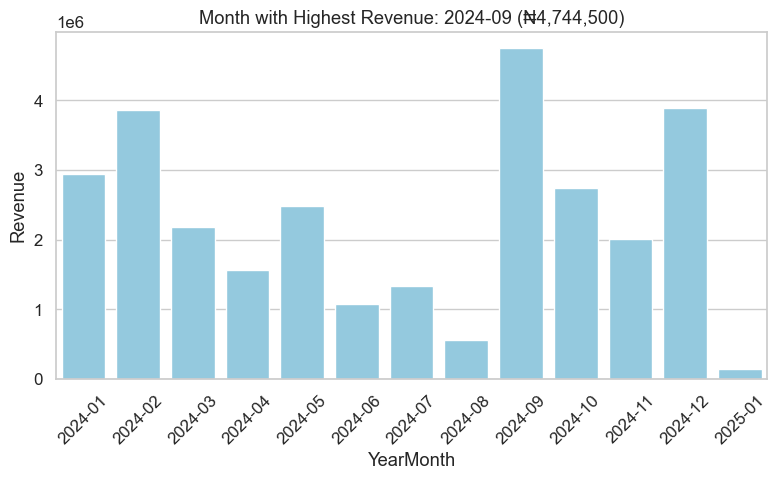

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(data=monthly_revenue, x='YearMonth', y='Revenue', color='skyblue')
plt.title(f"Month with Highest Revenue: {top_month['YearMonth']} (₦{top_month['Revenue']:,.0f})")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

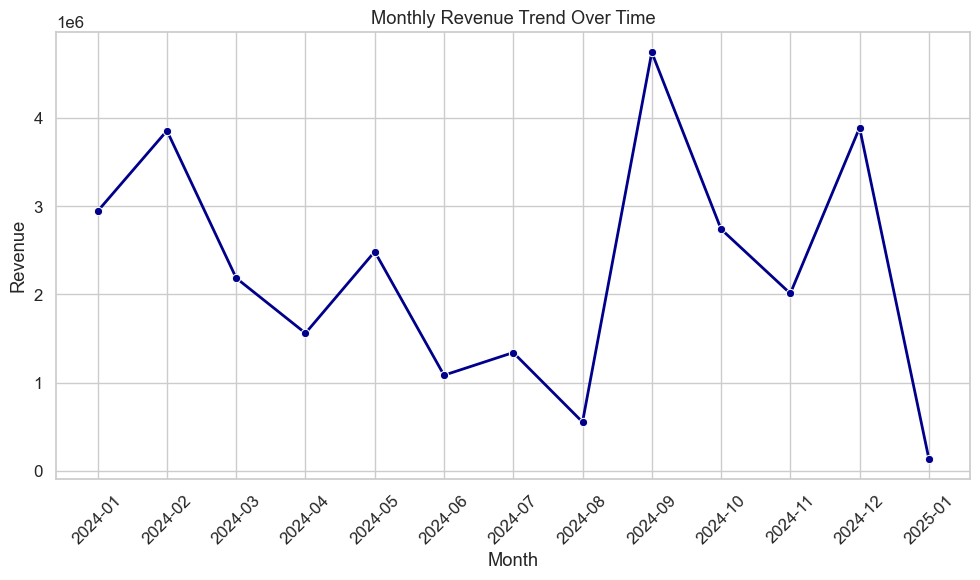

In [30]:
# --- 9. Monthly revenue trend (line plot) ---
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_revenue, x='YearMonth', y='Revenue', marker='o', linewidth=2, color='darkblue')
plt.title('Monthly Revenue Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [60]:
# --- 10. Revenue split between New and Returning customers ---
rev_split = invent.groupby('CustomerType')['Revenue'].sum().reset_index()
rev_split

,CustomerType,Revenue
0,New,12027000
1,Returning,17494000


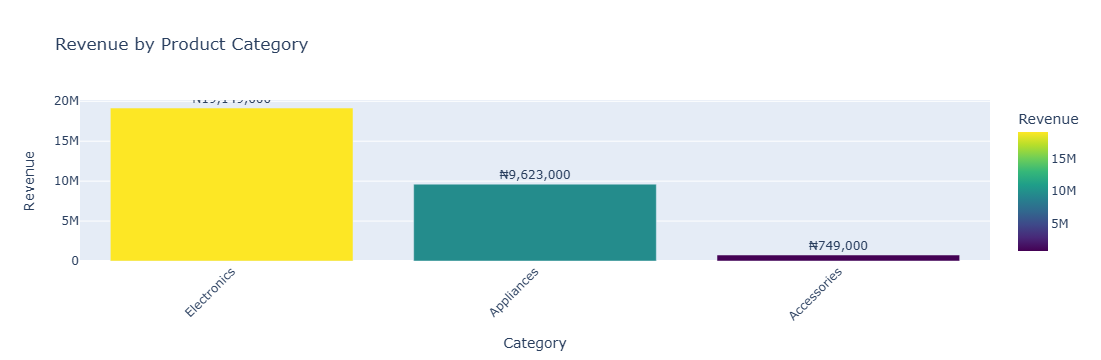

In [29]:

cat_rev = (
    invent.groupby('Category')['Revenue']
    .sum()
    .reset_index()
    .sort_values('Revenue', ascending=False)
)

fig = px.bar(
    cat_rev,
    x='Category',
    y='Revenue',
    title='Revenue by Product Category',
    text='Revenue',
    color='Revenue',
    color_continuous_scale='Viridis'
)

fig.update_traces(texttemplate='₦%{text:,.0f}', textposition='outside')
fig.update_layout(xaxis_tickangle=-45)
fig.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_42864\3631824425.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




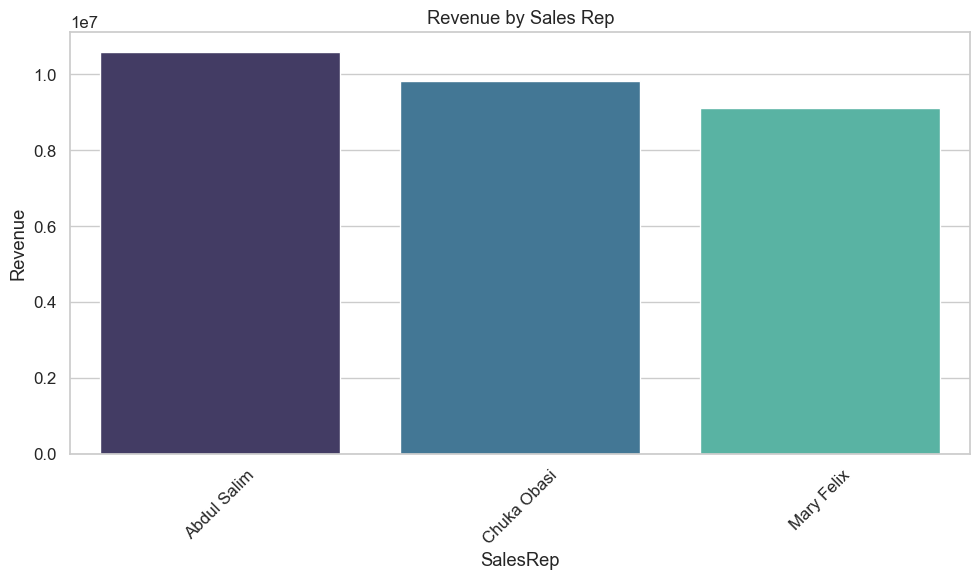

In [61]:
# --- 15. Revenue by Sales Rep ---
rep_rev = invent.groupby('SalesRep')['Revenue'].sum().reset_index().sort_values('Revenue', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=rep_rev, x='SalesRep', y='Revenue', palette='mako')
plt.title('Revenue by Sales Rep')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_532\1653350683.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




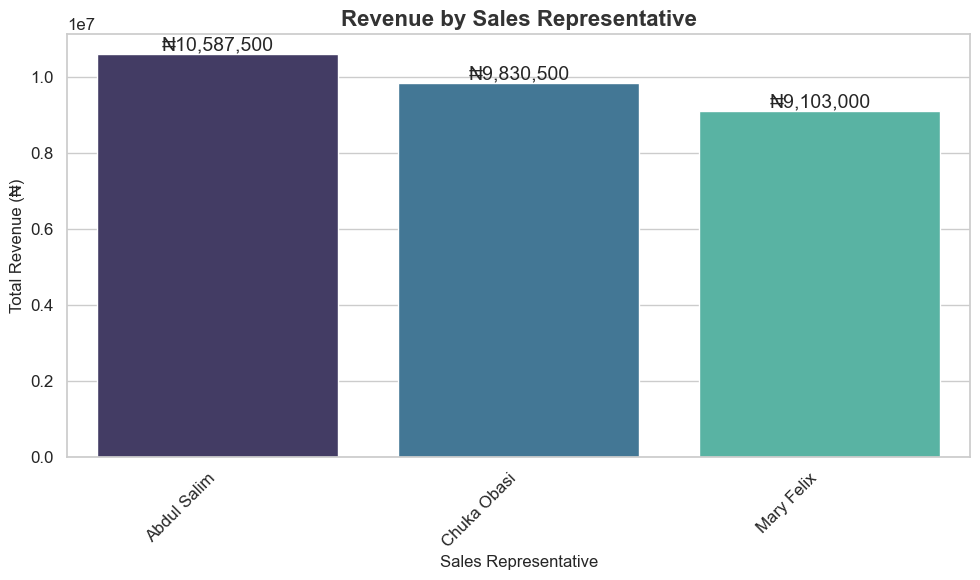

In [32]:

rep_rev = (
    invent.groupby('SalesRep')['Revenue']
    .sum()
    .reset_index()
    .sort_values('Revenue', ascending=False)
)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=rep_rev, x='SalesRep', y='Revenue', palette='mako')

# Add value labels on top of bars
for index, row in enumerate(rep_rev['Revenue']):
    plt.text(index, row + (row * 0.01), f"₦{row:,.0f}", ha='center', fontsize=14)
plt.title('Revenue by Sales Representative', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Sales Representative', fontsize=12)
plt.ylabel('Total Revenue (₦)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_42864\3931805231.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




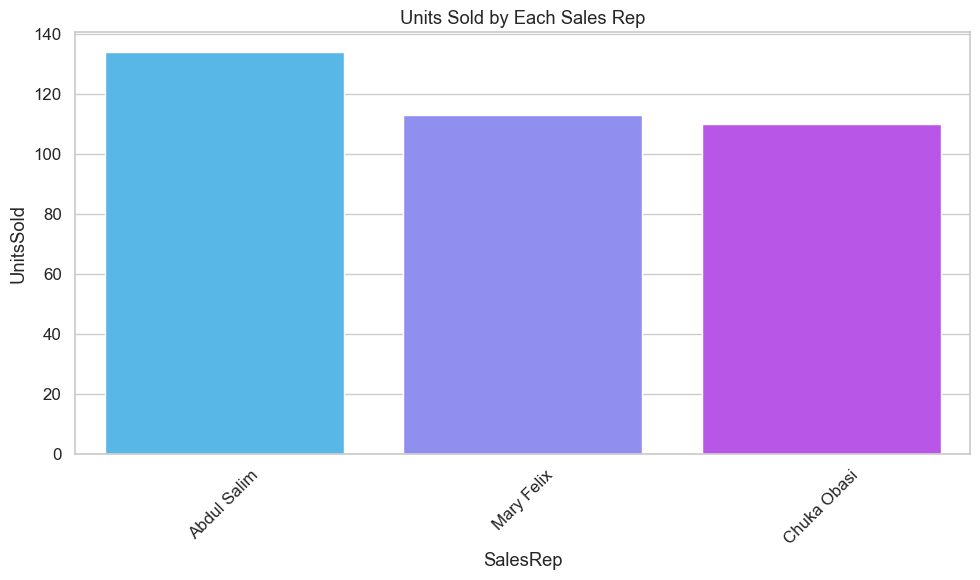

In [57]:
# --- 16. Units sold by each Sales Rep ---
rep_units = invent.groupby('SalesRep')['UnitsSold'].sum().reset_index().sort_values('UnitsSold', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=rep_units, x='SalesRep', y='UnitsSold', palette='cool')
plt.title('Units Sold by Each Sales Rep')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


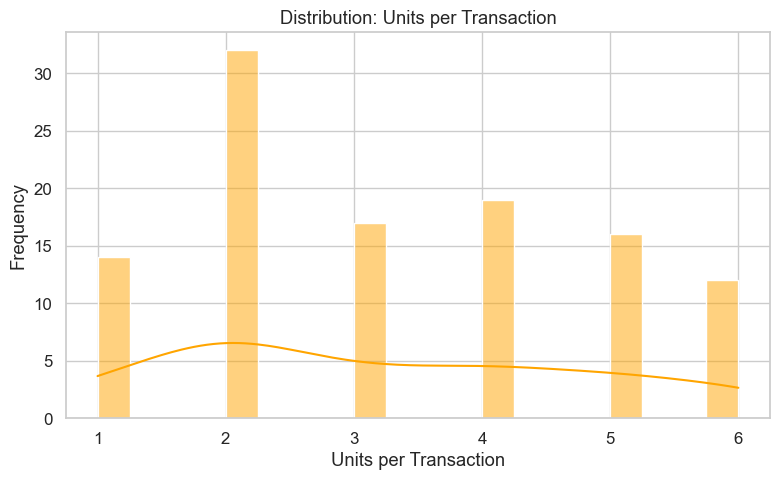

In [84]:
# --- 19. Distribution of Units per Transaction ---
units_per_trans = invent.groupby('TransactionID')['UnitsSold'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.histplot(units_per_trans['UnitsSold'], bins=20, kde=True, color='orange')
plt.title('Distribution: Units per Transaction')
plt.xlabel('Units per Transaction')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

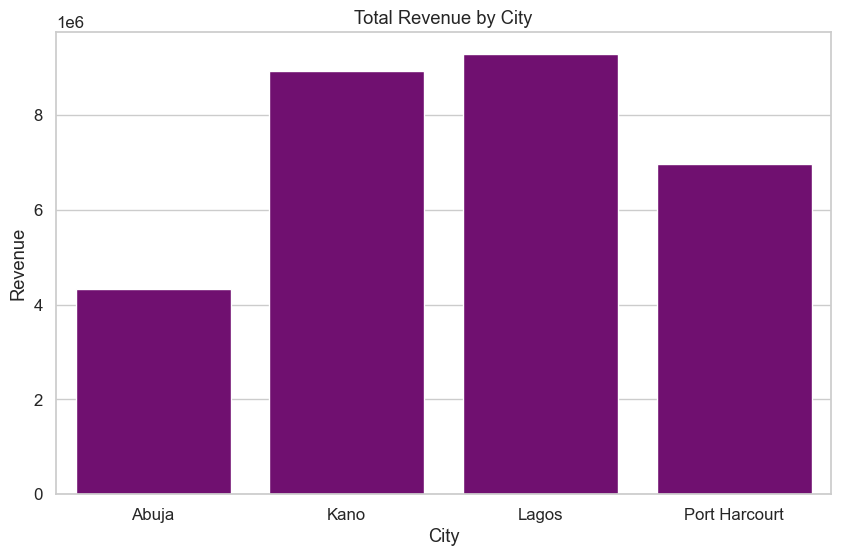

In [33]:

sns.set_style("whitegrid")

# 1. Total Revenue by City
city_revenue = invent.groupby("City")["Revenue"].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x="City", y="Revenue", color="purple", data=city_revenue)
plt.title("Total Revenue by City")
plt.show()

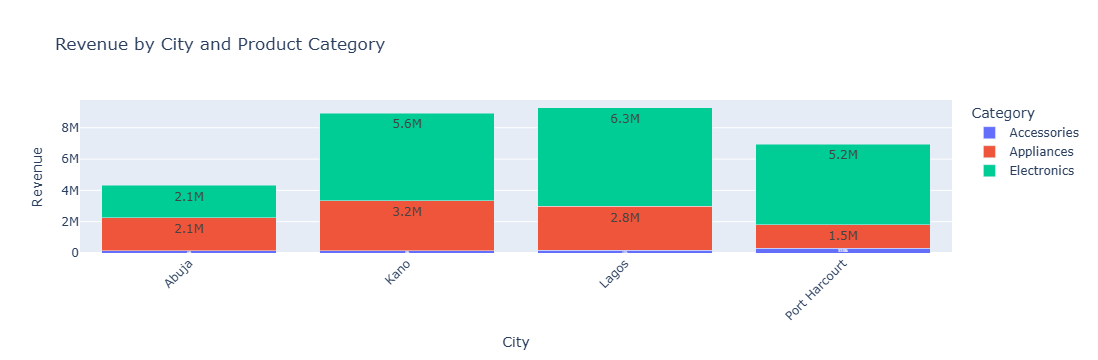

In [35]:


city_cat_rev = invent.groupby(["City", "Category"])["Revenue"].sum().reset_index()

fig = px.bar(
    city_cat_rev,
    x="City",
    y="Revenue",
    color="Category",
    title="Revenue by City and Product Category",
    text_auto='.2s'
)

fig.update_layout(barmode='stack', xaxis_tickangle=-45)
fig.show()


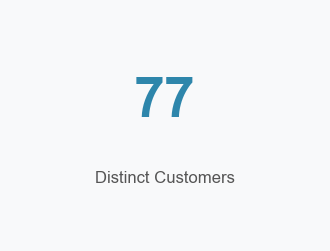

In [27]:

Distinct_customer = invent["CustomerID"].nunique()


fig, ax = plt.subplots(figsize=(4,3))
ax.set_facecolor("#F8F9FA")  # light grey background
fig.patch.set_facecolor("#F8F9FA")

ax.text(0.5, 0.6, f"{Distinct_customer:,}", 
        fontsize=40, fontweight='bold', color='#2E86AB', 
        ha='center', va='center')

ax.text(0.5, 0.25, "Distinct Customers", 
        fontsize=12, color='#555555', ha='center')

ax.axis("off")

for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()


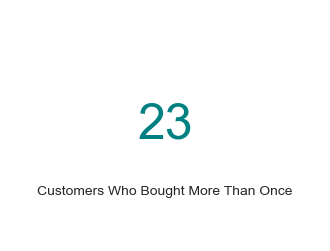

In [24]:
import matplotlib.pyplot as plt

customer_counts = invent["CustomerID"].value_counts()
customers_more_than_once = (customer_counts > 1).sum()

fig, ax = plt.subplots(figsize=(4,3))
ax.text(0.5, 0.5, f"{customers_more_than_once:,}", fontsize=36, ha='center', va='center', color='teal')
ax.text(0.5, 0.2, "Customers Who Bought More Than Once", fontsize=10, ha='center')
ax.axis("off")
plt.show()


In [85]:
pip install dash


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [86]:
pip install plotly


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [87]:
pip show dash

Name: dash
Version: 3.2.0
Summary: A Python framework for building reactive web-apps. Developed by Plotly.
Home-page: https://plotly.com/dash
Author: Chris Parmer
Author-email: chris@plotly.com
License: MIT
Location: C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages
Requires: Flask, importlib-metadata, nest-asyncio, plotly, requests, retrying, setuptools, typing-extensions, Werkzeug
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import dash
from dash import html

app = dash.Dash(__name__)
app.layout = html.Div(children=[html.H1('Hello Dash!')])

if __name__ == '__main__':
    app.run_server(debug=True)


In [17]:
pip install dash-bootstrap-components

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

